 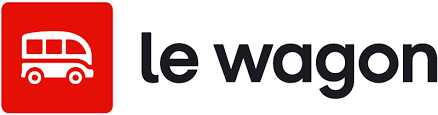

# Using Python to automate file aggregation

Import [gwz_orders_samples.csv](https://drive.google.com/file/d/12xwTe00IJ4Wv7S5jBYM--BVr-pv4eXWb/view?usp=sharing) in Colab and load it in a `df_orders` variable.


In [3]:
import pandas as pd

df_orders = pd.read_csv('gwz_orders_samples.csv')
df_orders

,date_date,orders_id,customers_id,country,department,total_quantity,total_turnover
0,2019-01-01,571,560,FRANCE,77.0,52,92.71
1,2019-01-01,287,282,FRANCE,17.0,19,97.94
2,2019-01-01,113,113,FRANCE,50.0,20,94.15
3,2019-01-01,519,510,FRANCE,22.0,8,73.78
4,2019-01-01,224,222,FRANCE,13.0,2,27.99
...,...,...,...,...,...,...,...
9995,2019-01-13,10207,5293,FRANCE,44.0,19,77.71
9996,2019-01-13,10155,9724,FRANCE,5.0,1,63.33
9997,2019-01-13,10151,9720,FRANCE,75.0,24,83.47
9998,2019-01-13,10822,10365,FRANCE,66.0,15,39.41


Execute the following cell. What does the code do ? How many folders have been created ?

In [4]:
import os

# storing the path to the current working directory (cwd)
root = os.getcwd()

# creating a path to a "sales" directory located inside the cwd
sales_folder_path = os.path.join(root, "sales")

# creating the sales directory
os.mkdir(sales_folder_path)

# creating a for loop that will iterate over the unique dates of the date_date column
for date in df_orders["date_date"].unique():

  # creating a directory for each unique date inside the "sales" directory
    sales_date_path = os.path.join(root, "sales", str(date))
    os.mkdir(sales_date_path)

  # filtering df_sales on the corrsponding date and exporting the filtered dataframe as a csv named 'orders.csv' in each directory
    df_sales_date = df_orders[df_orders.date_date==str(date)].reset_index()
    df_sales_date.to_csv(os.path.join(sales_date_path, "orders.csv"), index=False)


In [7]:
print(sales_folder_path)

/home/olamarujo/Projetos/Le Wagon/Python/03- Class/05- Automate Files Aggregation/sales


13

Use the `os` and `pandas` libraries to loop over all the folders to concatenate all files into a single 'orders.csv' file.

**Hint:**

- For each folder, load each file as a DataFrame.
- Store all DataFrames in a single list.
- Use `pd.concat()` function to stack multiple dataframes in a single one (remember to choose the correct 'axis' parameter!)


In [11]:
all_orders = []

for date_folder in os.listdir(sales_folder_path):

  path = os.path.join(root, 'sales', date_folder, 'orders.csv')

  file = pd.read_csv(path)

  all_orders.append(file)
  # append to the list
  # to be completed



# concatenate the dataframes
# to be completed


df_orders = pd.concat(all_orders,axis=0)
df_orders.shape

(10000, 8)

In [12]:
# save to .csv
df_orders.to_csv('orders_agg.csv')

This is a great example of how you can:

- Make data loading easier through Python

- Use `for` loops to significantly increase the efficiency of a task!


Imagine having to combine data from over 500 folders. Your code would still work perfectly! 🚀

